# Devnagri-Character-Recognition

The dataset was created by extraction and manual annotation of thousands of characters from handwritten documents.
Creator Name: Shailesh Acharya, `Email: sailes437@gmail.com`, Institution: University of North Texas, Cell: +19402200157
Creator Name: Prashnna Kumar Gyawali, `Email: gyawali.prasanna@gmail.com`, Institution: Rochester Institute of Technology
Data Type: GrayScale Image

The image dataset can be used to benchmark classification algorithm for OCR systems. The highest accuracy obtained in the Test set is 98.47%. Model Description is available in the paper.
Image Format: .png
Resolution: 32 by 32

Actual character is centered within 28 by 28 pixel, padding of 2 pixel is added on all four sides of actual character.

S. Acharya, A.K. Pant and P.K. Gyawali â€œDeep Learning Based Large Scale Handwritten Devanagari Character Recognitionâ€,In Proceedings of the 9th International Conference on Software, Knowledge, Information Management and Applications (SKIMA), pp. 121-126, 2015.
Your data will be in front of the world's largest data science community. What questions do you want to see answered?

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hrushi11","key":"9b9f258483748efbefebd15f467936bf"}'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d jhashanku007/devnagri-hindi-dataset

100% 158M/159M [00:04<00:00, 64.9MB/s]
100% 159M/159M [00:04<00:00, 40.3MB/s]


In [3]:
# downloading helper_functions.py
! wget https://raw.githubusercontent.com/Hrushi11/Dogs_VS_Cats/main/helper_functions.py

--2021-11-01 14:47:53--  https://raw.githubusercontent.com/Hrushi11/Dogs_VS_Cats/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10139 (9.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.90K  --.-KB/s    in 0s      

2021-11-01 14:47:53 (79.3 MB/s) - ‘helper_functions.py’ saved [10139/10139]



## Importing dependancies

In [130]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from helper_functions import unzip_data, plot_loss_curves, walk_through_dir, confusion_matrix, compare_historys

In [5]:
# Unzipping the data
unzip_data("/content/devnagri-hindi-dataset.zip")

In [6]:
# Walking through the dataset
walk_through_dir("/content/DevanagariHandwrittenCharacterDataset")

There are 2 directories and 0 images in '/content/DevanagariHandwrittenCharacterDataset'.
There are 46 directories and 0 images in '/content/DevanagariHandwrittenCharacterDataset/Train'.
There are 0 directories and 1700 images in '/content/DevanagariHandwrittenCharacterDataset/Train/digit_9'.
There are 0 directories and 1700 images in '/content/DevanagariHandwrittenCharacterDataset/Train/character_3_ga'.
There are 0 directories and 1700 images in '/content/DevanagariHandwrittenCharacterDataset/Train/digit_7'.
There are 0 directories and 1700 images in '/content/DevanagariHandwrittenCharacterDataset/Train/character_8_ja'.
There are 0 directories and 1700 images in '/content/DevanagariHandwrittenCharacterDataset/Train/character_16_tabala'.
There are 0 directories and 1700 images in '/content/DevanagariHandwrittenCharacterDataset/Train/character_31_petchiryakha'.
There are 0 directories and 1700 images in '/content/DevanagariHandwrittenCharacterDataset/Train/character_28_la'.
There are 0 

In [7]:
# To delete the zip file
!rm devnagri-hindi-dataset.zip

In [8]:
train_dir = "/content/DevanagariHandwrittenCharacterDataset/Train"
test_dir = "/content/DevanagariHandwrittenCharacterDataset/Test"

In [12]:
# loading and preprocessing the image
def load_and_prep(filepath):
  img = tf.io.read_file(filepath)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, (32, 32))
  if img.shape[2] == 1:
    img = tf.image.grayscale_to_rgb(img)
  return img

In [13]:
# setting up classes
classes = os.listdir(train_dir)

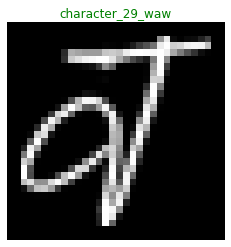

In [14]:
# Visualizing a random image
class_ = random.choice(classes)
img_path = random.choice(os.listdir(train_dir + "/" + class_))
img = load_and_prep(train_dir + "/" + class_ + "/" + img_path)
plt.imshow(img/255)
plt.axis(False)
plt.title(class_, color="green");

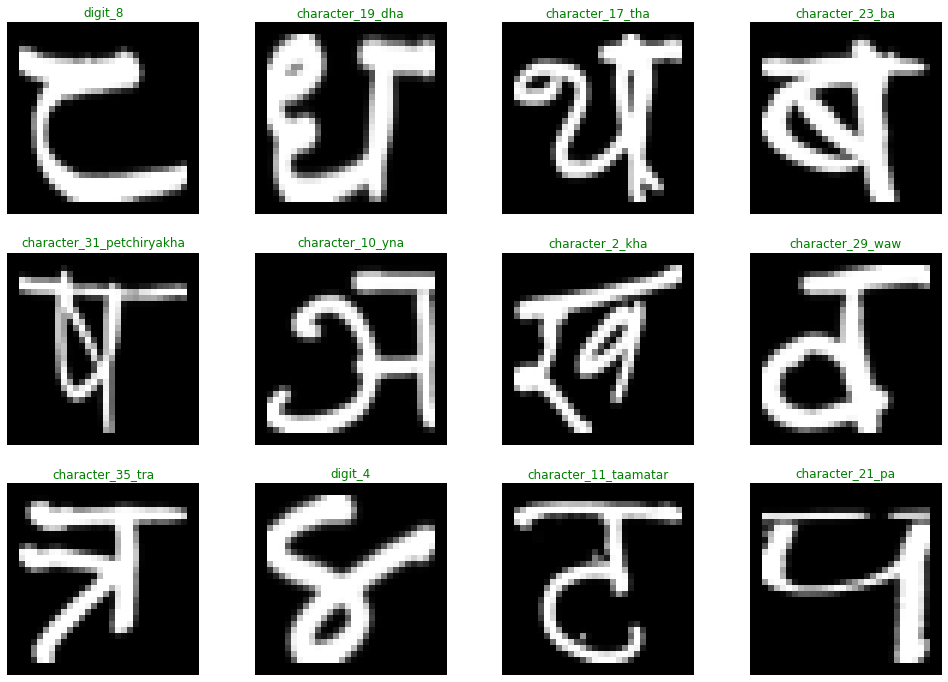

In [15]:
# Plotting multiple ranodm images
plt.figure(figsize=(17, 12))
for i in range(12):
  # Getting the image
  class_ = random.choice(classes)
  img_path = random.choice(os.listdir(train_dir + "/" + class_))
  img = load_and_prep(train_dir + "/" + class_ + "/" + img_path)
  
  # plotting on the subplot
  plt.subplot(3, 4, i+1)
  plt.imshow(img/255)
  plt.axis(False)
  plt.title(class_, color="green");

In [16]:
# Data generators
data_gen = ImageDataGenerator()

In [17]:
# Train and test data
train_data = data_gen.flow_from_directory(train_dir,
                                          seed=42,
                                          shuffle=True)

test_data = data_gen.flow_from_directory(test_dir,
                                         shuffle=False)

Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


In [18]:
len(train_data), len(test_data)

(2444, 432)

In [19]:
train_data.class_indices

{'character_10_yna': 0,
 'character_11_taamatar': 1,
 'character_12_thaa': 2,
 'character_13_daa': 3,
 'character_14_dhaa': 4,
 'character_15_adna': 5,
 'character_16_tabala': 6,
 'character_17_tha': 7,
 'character_18_da': 8,
 'character_19_dha': 9,
 'character_1_ka': 10,
 'character_20_na': 11,
 'character_21_pa': 12,
 'character_22_pha': 13,
 'character_23_ba': 14,
 'character_24_bha': 15,
 'character_25_ma': 16,
 'character_26_yaw': 17,
 'character_27_ra': 18,
 'character_28_la': 19,
 'character_29_waw': 20,
 'character_2_kha': 21,
 'character_30_motosaw': 22,
 'character_31_petchiryakha': 23,
 'character_32_patalosaw': 24,
 'character_33_ha': 25,
 'character_34_chhya': 26,
 'character_35_tra': 27,
 'character_36_gya': 28,
 'character_3_ga': 29,
 'character_4_gha': 30,
 'character_5_kna': 31,
 'character_6_cha': 32,
 'character_7_chha': 33,
 'character_8_ja': 34,
 'character_9_jha': 35,
 'digit_0': 36,
 'digit_1': 37,
 'digit_2': 38,
 'digit_3': 39,
 'digit_4': 40,
 'digit_5': 41,
 

In [20]:
labels = []
for i in train_data.class_indices.keys():
  labels.append(i)

In [21]:
labels

['character_10_yna',
 'character_11_taamatar',
 'character_12_thaa',
 'character_13_daa',
 'character_14_dhaa',
 'character_15_adna',
 'character_16_tabala',
 'character_17_tha',
 'character_18_da',
 'character_19_dha',
 'character_1_ka',
 'character_20_na',
 'character_21_pa',
 'character_22_pha',
 'character_23_ba',
 'character_24_bha',
 'character_25_ma',
 'character_26_yaw',
 'character_27_ra',
 'character_28_la',
 'character_29_waw',
 'character_2_kha',
 'character_30_motosaw',
 'character_31_petchiryakha',
 'character_32_patalosaw',
 'character_33_ha',
 'character_34_chhya',
 'character_35_tra',
 'character_36_gya',
 'character_3_ga',
 'character_4_gha',
 'character_5_kna',
 'character_6_cha',
 'character_7_chha',
 'character_8_ja',
 'character_9_jha',
 'digit_0',
 'digit_1',
 'digit_2',
 'digit_3',
 'digit_4',
 'digit_5',
 'digit_6',
 'digit_7',
 'digit_8',
 'digit_9']

## Building the model

In [ ]:
# Setting up base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Setting input layer 
inputs = tf.keras.layers.Input(shape=(32, 32, 1), name="input_layer")
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x) 
outputs = tf.keras.layers.Dense(len(labels), activation="softmax", name="output_layer")(x) 
model_1 = tf.keras.Model(inputs, outputs)

# compiling the model
model_1.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(len(test_data) * 0.25))

Epoch 1/5
2444/2444 [==============================] - 427s 160ms/step - loss: 1.1488 - accuracy: 0.7455 - val_loss: 0.6485 - val_accuracy: 0.8484
Epoch 2/5
2444/2444 [==============================] - 388s 159ms/step - loss: 0.4858 - accuracy: 0.8854 - val_loss: 0.4138 - val_accuracy: 0.9016
Epoch 3/5
2444/2444 [==============================] - 388s 159ms/step - loss: 0.3491 - accuracy: 0.9159 - val_loss: 0.3115 - val_accuracy: 0.9207
Epoch 4/5
2444/2444 [==============================] - 388s 159ms/step - loss: 0.2812 - accuracy: 0.9306 - val_loss: 0.2892 - val_accuracy: 0.9233
Epoch 5/5
2444/2444 [==============================] - 388s 159ms/step - loss: 0.2385 - accuracy: 0.9411 - val_loss: 0.2434 - val_accuracy: 0.9323


In [ ]:
model_1.evaluate(test_data)

432/432 [==============================] - 66s 153ms/step - loss: 0.2344 - accuracy: 0.9399


[0.23439805209636688, 0.9398550987243652]

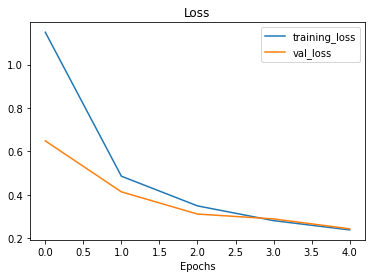

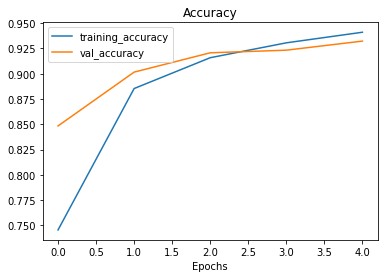

In [ ]:
plot_loss_curves(history_1)

In [ ]:
# Unfreeze all of the layers in the base model
base_model.trainable = True

# Refreeze every layer except for the last 5
for layer in base_model.layers[:-5]:
  layer.trainable = False

# Recompile model with lower learning rate
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(1e-4),
                metrics=['accuracy'])

# Fine-tune for 5 more epochs
fine_tune_epochs = 10 

history_1_fine_tune_1 = model_1.fit(train_data,
                                    epochs=fine_tune_epochs,
                                    validation_data=test_data,
                                    validation_steps=int(len(test_data) * 0.25), 
                                    initial_epoch=history_1.epoch[-1])

Epoch 5/10
2444/2444 [==============================] - 412s 165ms/step - loss: 0.1618 - accuracy: 0.9537 - val_loss: 0.1492 - val_accuracy: 0.9566
Epoch 6/10
2444/2444 [==============================] - 403s 165ms/step - loss: 0.1020 - accuracy: 0.9706 - val_loss: 0.1173 - val_accuracy: 0.9650
Epoch 7/10
2444/2444 [==============================] - 402s 165ms/step - loss: 0.0759 - accuracy: 0.9788 - val_loss: 0.0910 - val_accuracy: 0.9722
Epoch 8/10
2444/2444 [==============================] - 402s 165ms/step - loss: 0.0598 - accuracy: 0.9834 - val_loss: 0.0687 - val_accuracy: 0.9792
Epoch 9/10
2444/2444 [==============================] - 405s 166ms/step - loss: 0.0475 - accuracy: 0.9868 - val_loss: 0.0787 - val_accuracy: 0.9769
Epoch 10/10
2444/2444 [==============================] - 405s 166ms/step - loss: 0.0386 - accuracy: 0.9895 - val_loss: 0.0832 - val_accuracy: 0.9742


In [ ]:
model_1.evaluate(test_data)

432/432 [==============================] - 66s 152ms/step - loss: 0.0645 - accuracy: 0.9815


[0.06451807171106339, 0.981521725654602]

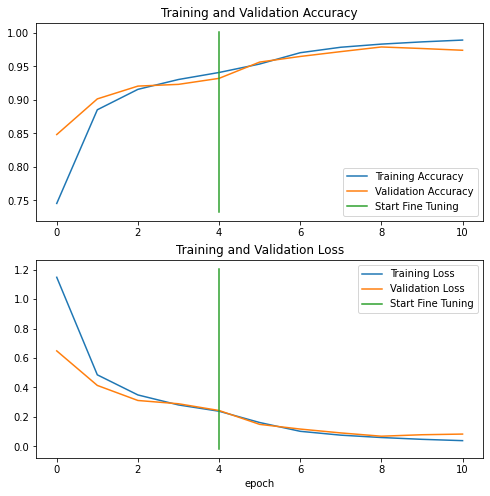

In [ ]:
compare_historys(history_1, history_1_fine_tune_1)

In [ ]:
# Saving the model
model_1.save("/content/drive/MyDrive/Hindi-OCR")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Hindi-OCR/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [22]:
# Loading a model
model_1 = tf.keras.models.load_model("/content/drive/MyDrive/Hindi-OCR")

## Insights in our model

In [23]:
preds = model_1.predict(test_data)

In [24]:
preds[0]

array([9.9582881e-01, 2.6212038e-11, 9.8154579e-13, 3.9618858e-10,
       4.9600901e-12, 3.7116474e-13, 7.7138845e-10, 1.3794156e-06,
       7.2012174e-11, 5.6772973e-07, 4.5733076e-10, 2.0151650e-05,
       1.0675103e-12, 1.6194118e-10, 2.3464647e-08, 2.5897662e-04,
       4.8776155e-08, 3.4213465e-07, 1.5583765e-11, 6.2619351e-05,
       4.7069229e-09, 5.9471159e-08, 6.1910293e-07, 1.7079125e-11,
       1.7062344e-05, 8.4313848e-11, 7.5230616e-07, 3.5860432e-07,
       1.3313568e-04, 6.8861840e-07, 1.1280036e-07, 6.1802695e-07,
       2.7936586e-08, 1.2068566e-09, 3.6736231e-03, 1.4535169e-08,
       8.2223413e-14, 2.9153526e-12, 5.9057175e-13, 5.9487788e-13,
       4.2920433e-12, 4.3636414e-09, 1.6776560e-12, 7.1392295e-13,
       5.9168653e-14, 1.7717716e-16], dtype=float32)

In [25]:
preds[0].argmax()

0

In [26]:
preds[0].max()

0.9958288

In [27]:
true = []
for i in test_data.filepaths:
  true.append(i.split("/")[4])

In [28]:
len(true)

13800

In [29]:
pred_indices = []
for i in preds:
  pred_indices.append(i.argmax())

In [30]:
len(pred_indices)

13800

In [31]:
pred_labels = []
for i in pred_indices:
  pred_labels.append(labels[i])

In [32]:
len(pred_labels)

13800

In [33]:
check = []
for i in range(len(pred_labels)):
  check.append("True") if true[i] == pred_labels[i] else check.append("False")

In [34]:
len(check)

13800

In [35]:
pred_prob = []
for i in range(len(pred_labels)):
  pred_prob.append(preds[i].max())

In [36]:
pred_prob[0]

0.9958288

In [37]:
df_test_preds = pd.DataFrame({"Filepath": test_data.filepaths,
                              "True label": true,
                              "Pred label": pred_labels,
                              "Pred Prob": pred_prob,
                              "Check": check})

In [38]:
df_test_preds.head()

,Filepath,True label,Pred label,Pred Prob,Check
0,/content/DevanagariHandwrittenCharacterDataset...,character_10_yna,character_10_yna,0.995829,True
1,/content/DevanagariHandwrittenCharacterDataset...,character_10_yna,character_10_yna,0.988693,True
2,/content/DevanagariHandwrittenCharacterDataset...,character_10_yna,character_10_yna,0.989036,True
3,/content/DevanagariHandwrittenCharacterDataset...,character_10_yna,character_10_yna,0.997819,True
4,/content/DevanagariHandwrittenCharacterDataset...,character_10_yna,character_10_yna,0.928055,True


In [39]:
df_test_preds.tail()

,Filepath,True label,Pred label,Pred Prob,Check
13795,/content/DevanagariHandwrittenCharacterDataset...,digit_9,digit_9,1.000000,True
13796,/content/DevanagariHandwrittenCharacterDataset...,digit_9,digit_9,0.999999,True
13797,/content/DevanagariHandwrittenCharacterDataset...,digit_9,digit_9,1.000000,True
13798,/content/DevanagariHandwrittenCharacterDataset...,digit_9,digit_9,0.999762,True
13799,/content/DevanagariHandwrittenCharacterDataset...,digit_9,digit_9,0.999955,True


In [40]:
filepaths = test_data.filepaths

In [41]:
wrng_filepaths = []
wrng_pred = []
true_ = []
wrng_pred_prob = []
for i in range(len(pred_labels)):
  if check[i] == "False":
    true_.append(true[i])
    wrng_filepaths.append(filepaths[i])
    wrng_pred.append(pred_labels[i])
    wrng_pred_prob.append(pred_prob[i])

In [42]:
len(wrng_pred)

255

In [43]:
df_wrng_test_preds = pd.DataFrame({"Filepath": wrng_filepaths,
                                   "True label": true_,
                                   "Pred label": wrng_pred,
                                   "Pred Prob": wrng_pred_prob})

In [44]:
df_wrng_test_preds.head()

,Filepath,True label,Pred label,Pred Prob
0,/content/DevanagariHandwrittenCharacterDataset...,character_10_yna,character_24_bha,0.554238
1,/content/DevanagariHandwrittenCharacterDataset...,character_10_yna,character_8_ja,0.589436
2,/content/DevanagariHandwrittenCharacterDataset...,character_10_yna,character_8_ja,0.800656
3,/content/DevanagariHandwrittenCharacterDataset...,character_10_yna,character_17_tha,0.480395
4,/content/DevanagariHandwrittenCharacterDataset...,character_10_yna,character_8_ja,0.716537


In [45]:
df_wrng_test_preds.tail()

,Filepath,True label,Pred label,Pred Prob
250,/content/DevanagariHandwrittenCharacterDataset...,digit_6,character_4_gha,0.424101
251,/content/DevanagariHandwrittenCharacterDataset...,digit_6,digit_3,0.992277
252,/content/DevanagariHandwrittenCharacterDataset...,digit_6,character_7_chha,0.471611
253,/content/DevanagariHandwrittenCharacterDataset...,digit_7,digit_1,0.372736
254,/content/DevanagariHandwrittenCharacterDataset...,digit_9,digit_3,0.749345


In [46]:
df_wrng_test_preds

,Filepath,True label,Pred label,Pred Prob
0,/content/DevanagariHandwrittenCharacterDataset...,character_10_yna,character_24_bha,0.554238
1,/content/DevanagariHandwrittenCharacterDataset...,character_10_yna,character_8_ja,0.589436
2,/content/DevanagariHandwrittenCharacterDataset...,character_10_yna,character_8_ja,0.800656
3,/content/DevanagariHandwrittenCharacterDataset...,character_10_yna,character_17_tha,0.480395
4,/content/DevanagariHandwrittenCharacterDataset...,character_10_yna,character_8_ja,0.716537
...,...,...,...,...
250,/content/DevanagariHandwrittenCharacterDataset...,digit_6,character_4_gha,0.424101
251,/content/DevanagariHandwrittenCharacterDataset...,digit_6,digit_3,0.992277
252,/content/DevanagariHandwrittenCharacterDataset...,digit_6,character_7_chha,0.471611
253,/content/DevanagariHandwrittenCharacterDataset...,digit_7,digit_1,0.372736


In [47]:
# df_wrng_test_preds.to_csv("/content/drive/MyDrive/Hindi-OCR/Wrong-preds.csv")

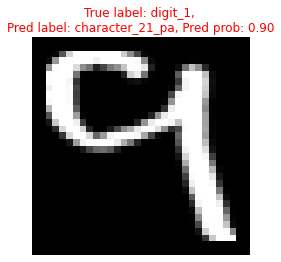

In [48]:
# Visualizing wrong predictions
rand_num = np.random.randint(len(wrng_pred))
img = load_and_prep(wrng_filepaths[rand_num])
plt.imshow(img/255)
plt.axis(False)
title_ = f"True label: {true_[rand_num]}, \nPred label: {wrng_pred[rand_num]}, Pred prob: {wrng_pred_prob[rand_num]:.2f}"
plt.title(title_, color = "red");

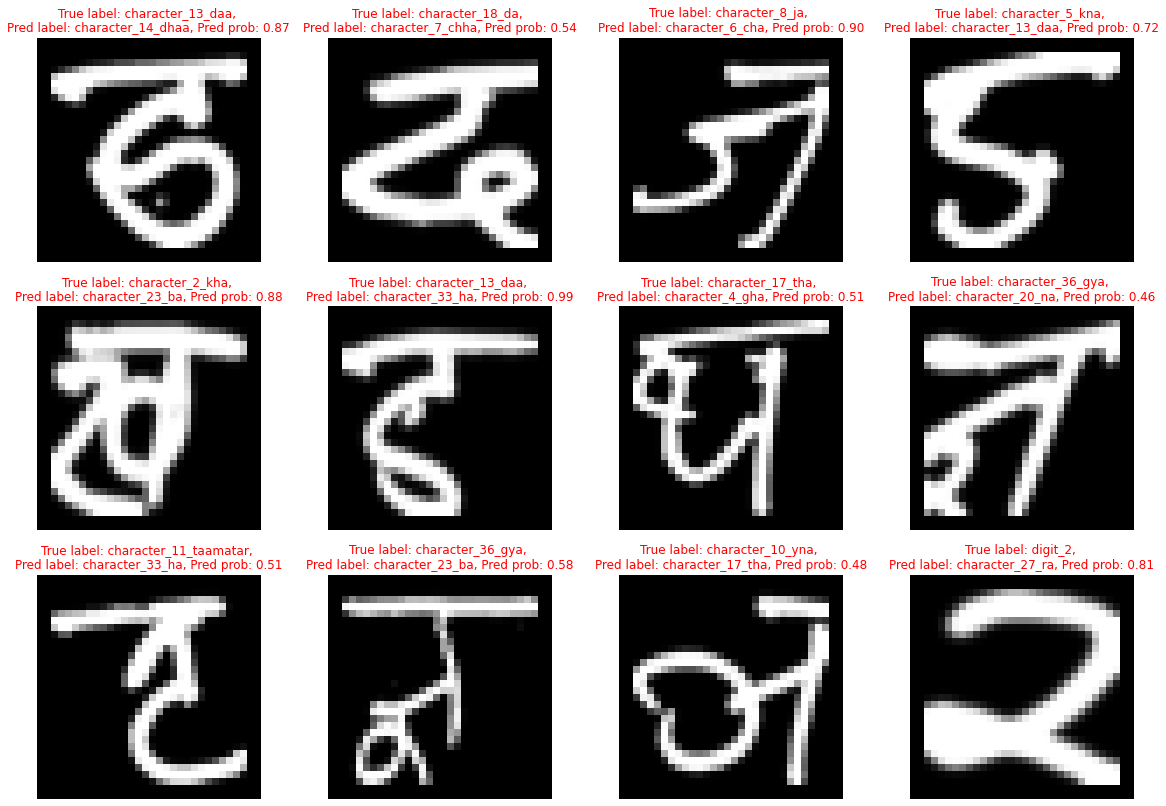

In [127]:
# Plotting multiple random wrong images
plt.figure(figsize=(20, 14))
rand_set = random.sample(range(len(wrng_pred)), 12)
for i in range(12):
  # getting images
  title_ = f"True label: {true_[rand_set[i]]}, \nPred label: {wrng_pred[rand_set[i]]}, Pred prob: {wrng_pred_prob[rand_set[i]]:.2f}"
  img = load_and_prep(wrng_filepaths[rand_set[i]])

  # plotting images
  plt.subplot(3, 4, i+1)
  plt.imshow(img/255)
  plt.axis(False)
  plt.title(title_, color="red");

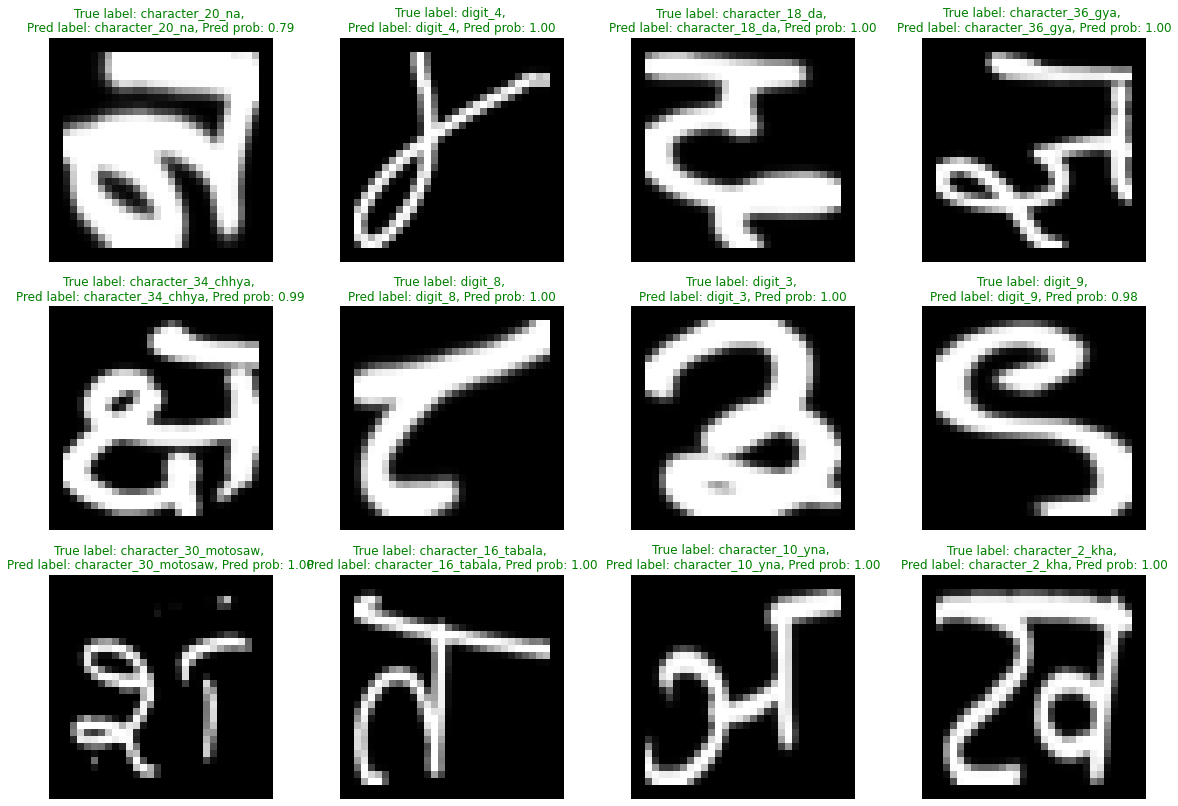

In [129]:
# Random Predictions
plt.figure(figsize=(20, 14))
rand_set = random.sample(range(len(pred_prob)), 12)
for i in range(12):
  # getting images
  title_ = f"True label: {true[rand_set[i]]}, \nPred label: {pred_labels[rand_set[i]]}, Pred prob: {pred_prob[rand_set[i]]:.2f}"
  img = load_and_prep(filepaths[rand_set[i]])
  clr = "green" if true[rand_set[i]] == pred_labels[rand_set[i]] else "red"

  # plotting images
  plt.subplot(3, 4, i+1)
  plt.imshow(img/255)
  plt.axis(False)
  plt.title(title_, color=clr);